# MedTourEasy - Blood donation Project

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support

## Loading the blood donations data

In [2]:
data=pd.read_csv('Dataset/transfusion.data')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [56]:
data = data.rename(columns={'whether he/she donated blood in March 2007': 'Donated'})

#### EDA (Exploratory Data Analysis)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Donated                748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


 ##### Observation :
 
1. There are 748 records(rows) available
2. There are 5 columns available
3. There is no null data
4. All the columns have integer(numeric) values (ie. there is no categorical data)

#### To find 'N' unique columns in Dataset

In [58]:
for col in data.columns:
    print(col, '    :', len(data[col].unique()), 'labels')

Recency (months)     : 31 labels
Frequency (times)     : 33 labels
Monetary (c.c. blood)     : 33 labels
Time (months)     : 78 labels
Donated     : 2 labels


In [59]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Visualization

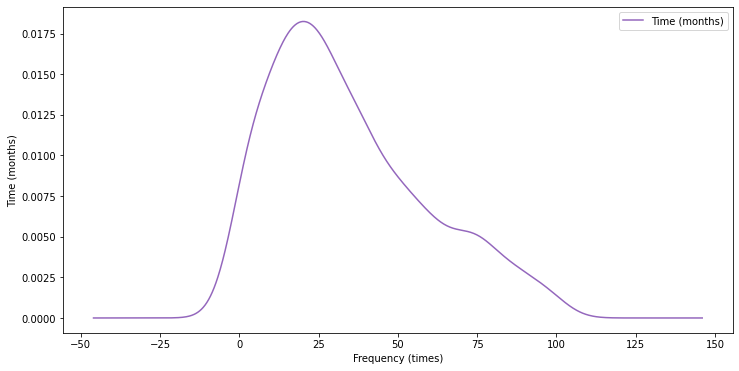

In [60]:
data.sort_values(by="Monetary (c.c. blood)", ascending=False).plot(x='Frequency (times)',
                                                           y='Time (months)',kind='kde', color= 'tab:purple',figsize=(12,6))
plt.xlabel('Frequency (times)')
plt.ylabel('Time (months)')
plt.show()

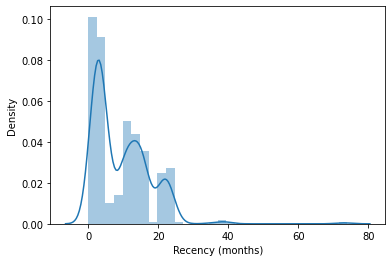

In [61]:
sns.distplot(data['Recency (months)'])
plt.show()

In [62]:
continuous_feature = data[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)','Time (months)']]

#### To find outliers, median, Q1, Q3, min and max of continuous variables

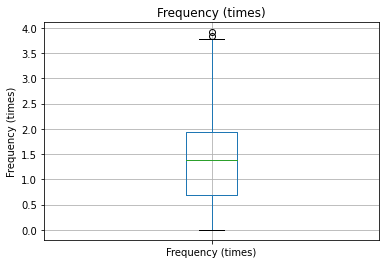

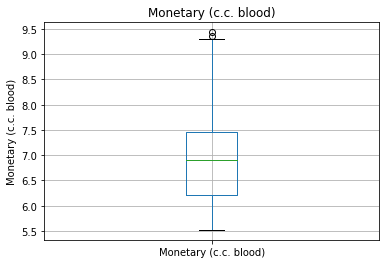

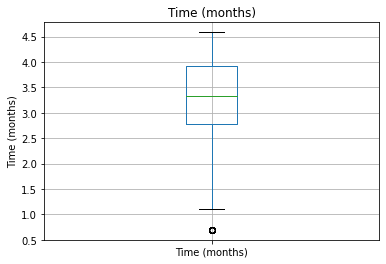

In [47]:
for feature in continuous_feature:
    data1=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        data1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

There are very few outliers

In [117]:
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated,log_Recency,log_Frequency,log_Monetary,log_Time
0,1.098612,50,12500,98,1,0.741276,3.931826,9.433564,4.595120
1,0.000000,13,3250,28,1,0.000000,2.639057,8.086718,3.367296
2,0.693147,16,4000,35,1,0.526589,2.833213,8.294300,3.583519
3,1.098612,20,5000,45,1,0.741276,3.044522,8.517393,3.828641
4,0.693147,24,6000,77,0,0.526589,3.218876,8.699681,4.356709
...,...,...,...,...,...,...,...,...,...
743,3.178054,2,500,38,0,1.429846,1.098612,6.216606,3.663562
744,3.091042,2,500,52,0,1.408800,1.098612,6.216606,3.970292
745,3.178054,3,750,62,0,1.429846,1.386294,6.621406,4.143135
746,3.688879,1,250,39,0,1.545194,0.693147,5.525453,3.688879


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


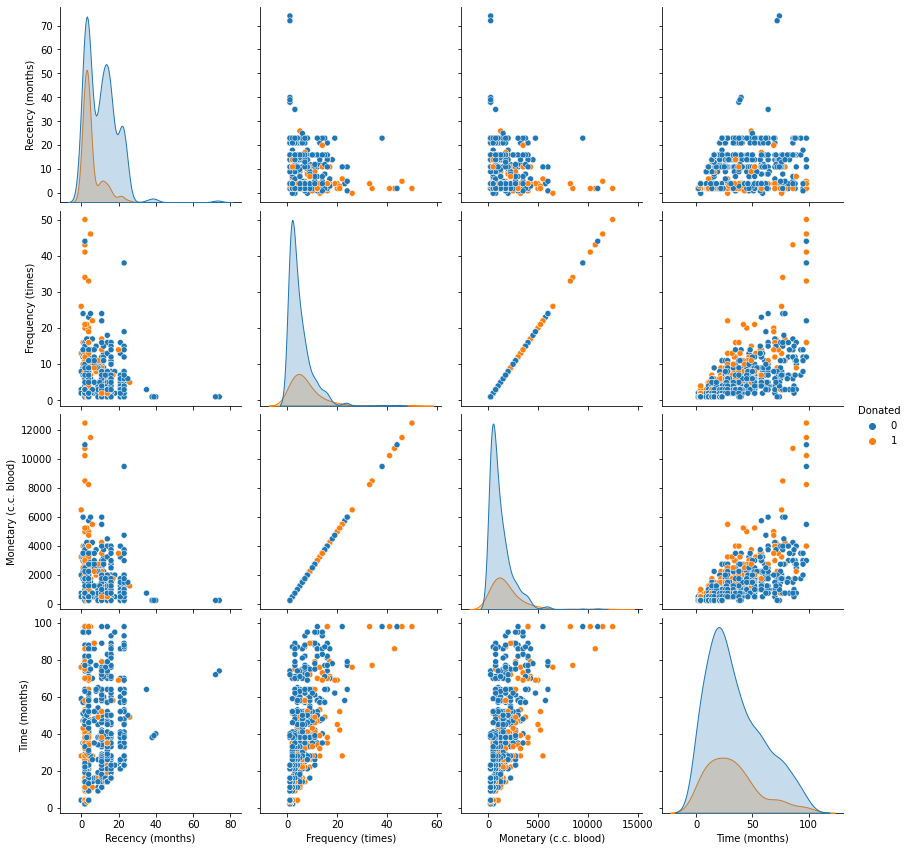

In [65]:
# sns.pairplot(data.drop("Id", axis=1), hue="whether he/she donated blood in March 2007", size=3)
sns.pairplot(data, hue="Donated", size=3)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


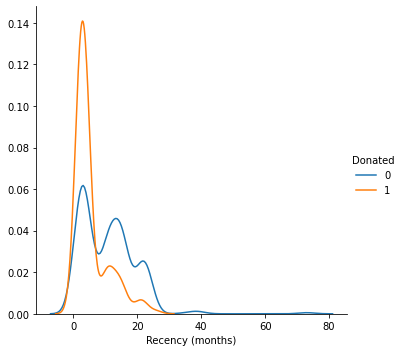

In [66]:
sns.FacetGrid(data, hue="Donated", size=5) \
   .map(sns.kdeplot, "Recency (months)") \
   .add_legend()
plt.show()

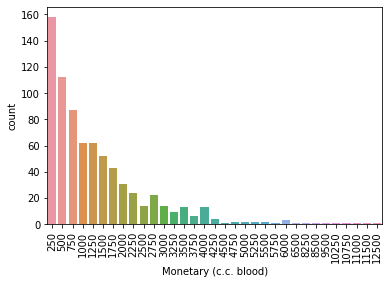

In [86]:
sns.countplot(data['Monetary (c.c. blood)'])
plt.xticks(rotation=90)
plt.show()

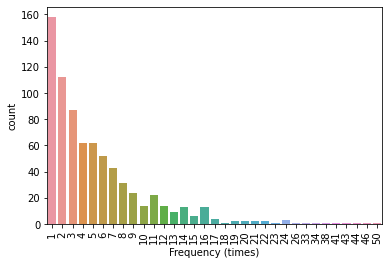

In [88]:
sns.countplot(data['Frequency (times)'])
plt.xticks(rotation=90)
plt.show()

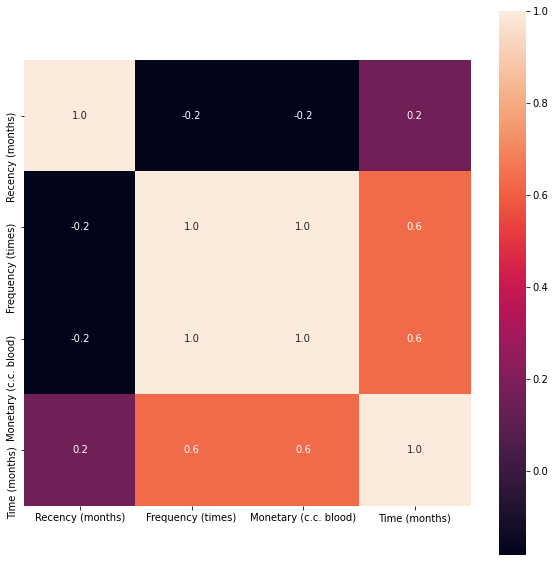

In [70]:
fig, ax=plt.subplots(figsize=(10,10))
data1=data.drop('Donated', axis=1)
sns.heatmap(data1.corr(),ax=ax,fmt='0.1f',annot=True, square=True)
plt.show()

#### Checking target incidence

In [49]:
data['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

### Log normalization

In [111]:
import scipy.stats as stats
def diagnostic_plots(data, variable):
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    data[variable].hist()

    plt.subplot(1,2,2)
    stats.probplot(data[variable], dist='norm', plot=plt)

    plt.show()

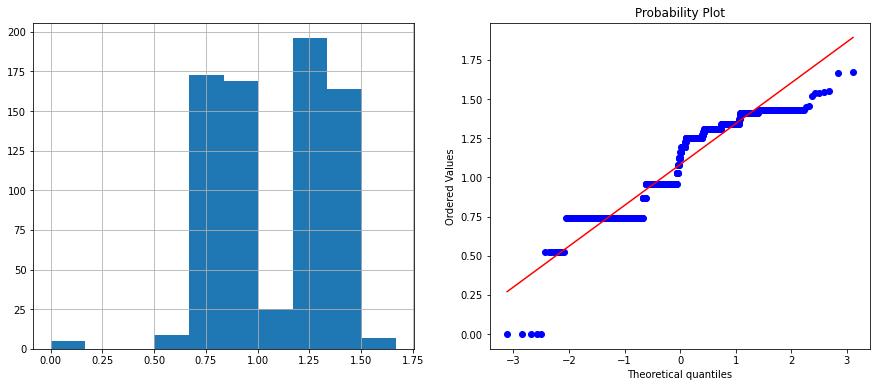

In [113]:
data['log_Recency']=np.log(data['Recency (months)']+1)
diagnostic_plots(data, 'log_Recency')

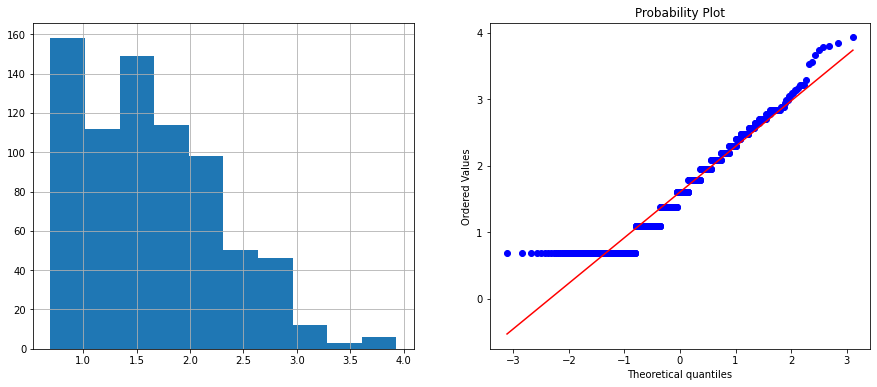

In [114]:
data['log_Frequency']=np.log(data['Frequency (times)']+1)
diagnostic_plots(data, 'log_Frequency')

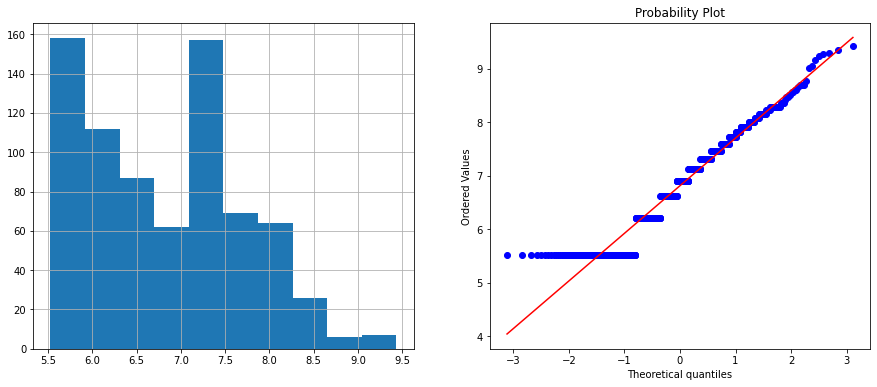

In [115]:
data['log_Monetary']=np.log(data['Monetary (c.c. blood)']+1)
diagnostic_plots(data, 'log_Monetary')

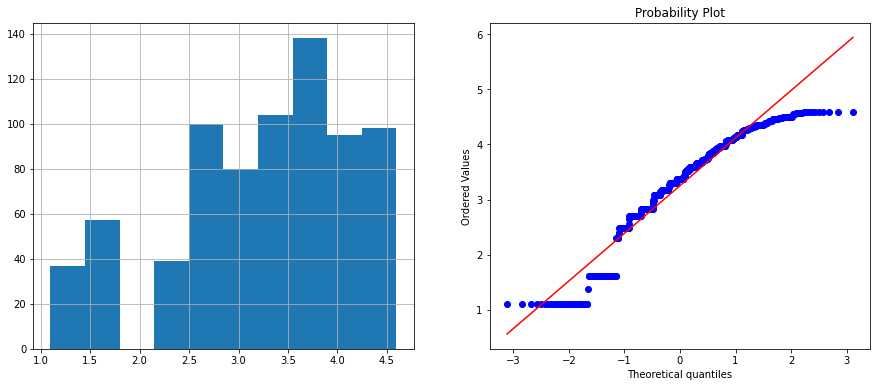

In [116]:
data['log_Time']=np.log(data['Time (months)']+1)
diagnostic_plots(data, 'log_Time')

#### Splitting transfusion into train and test datasets

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [131]:
data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'Donated', 'log_Recency', 'log_Frequency',
       'log_Monetary', 'log_Time'],
      dtype='object')

In [132]:
x=data.drop(['Time (months)','Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',"Donated"],axis=1)
y=data['Donated']

In [133]:
x

,log_Recency,log_Frequency,log_Monetary,log_Time
0,0.741276,3.931826,9.433564,4.595120
1,0.000000,2.639057,8.086718,3.367296
2,0.526589,2.833213,8.294300,3.583519
3,0.741276,3.044522,8.517393,3.828641
4,0.526589,3.218876,8.699681,4.356709
...,...,...,...,...
743,1.429846,1.098612,6.216606,3.663562
744,1.408800,1.098612,6.216606,3.970292
745,1.429846,1.386294,6.621406,4.143135
746,1.545194,0.693147,5.525453,3.688879


In [134]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.70,random_state=42)

<IPython.core.display.Javascript object>

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

#### Model fit

In [136]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

### Training data prediction Accuracy 

In [137]:
# check the accuracy on the training set
model.score(X_train, y_train)

0.7839388145315488

In [124]:
y_predt=model.predict(X_test)
y_predt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [125]:
from sklearn import metrics

# generate evaluation metrics

print ("Accuracy :", metrics.accuracy_score(y_predt, model.predict(X_test)))
print ("Confusion matrix :",metrics.confusion_matrix(y_predt, model.predict(X_test)))
print ("classification report :", metrics.classification_report(y_predt, model.predict(X_test)))

Accuracy : 1.0
Confusion matrix : [[214   0]
 [  0  11]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        11

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



## Evaluation and comparison of all the models

In [126]:
# Logistic Regression


logreg= LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier() 

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [127]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "XGB",
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_predt))   

In [128]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.955556,SVC
1,0.840000,DecisionTreeClassifier
2,1.000000,LogisticRegression
3,0.888889,KNeighborsClassifier
4,0.902222,XGB
5,0.866667,RandomForestClassifier
6,0.880000,GradientBoostingClassifier


Text(0.5, 1.0, 'Accuracy of all Algorithms')

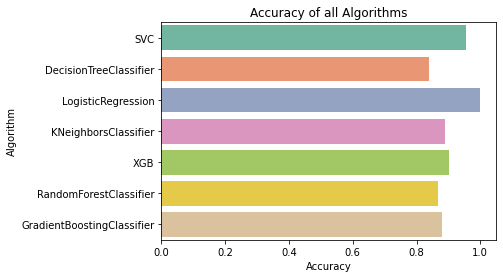

In [129]:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "Set2").set_title('Accuracy of all Algorithms')

** Based on the above, Logistic Regression is the best model by giving the highest accuracy.